# Lead Scoring 

An education company named X Education sells online courses to industry professionals.The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead.X Education requires the most promising leads, i.e. the leads that are most likely to convert into paying customers.

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',70)
pd.set_option('display.max_columns',70)

%matplotlib inline

In [2]:
# Reading the csv
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Data Visualization 

[]

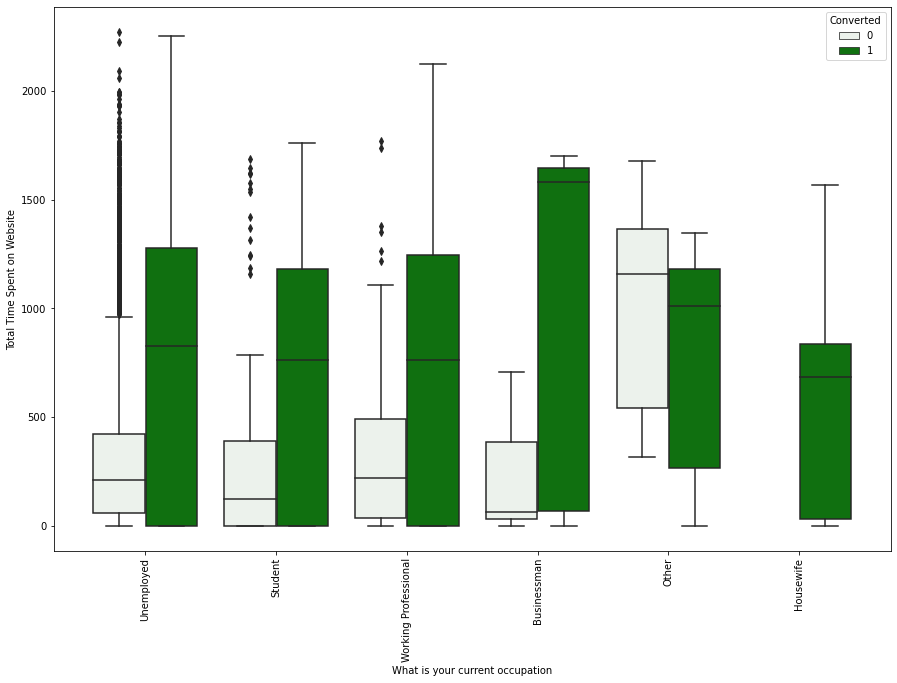

In [6]:
# current occupation vs time spent
plt.figure(figsize = (15,10))
sns.boxplot(x = 'What is your current occupation' , y = 'Total Time Spent on Website' , hue = 'Converted',color = 'Green' ,data = df)
plt.xticks(rotation = 90)
plt.plot()

[]

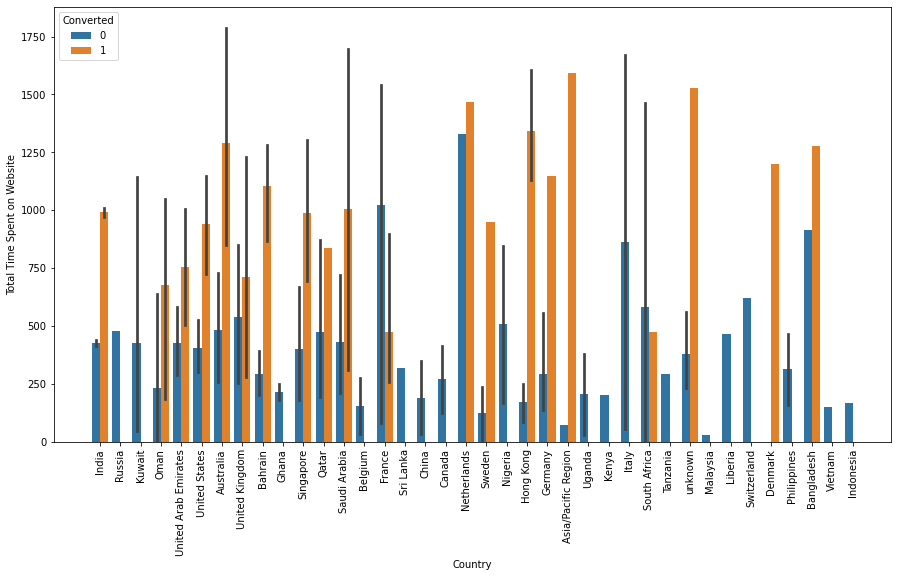

In [7]:
# Country vs total time spent on website
plt.figure(figsize = (15,8))
sns.barplot(x = 'Country' , y = 'Total Time Spent on Website' , hue = 'Converted' ,data = df)
plt.xticks(rotation = 90)
plt.plot()

<AxesSubplot:xlabel='Asymmetrique Activity Score', ylabel='Asymmetrique Profile Score'>

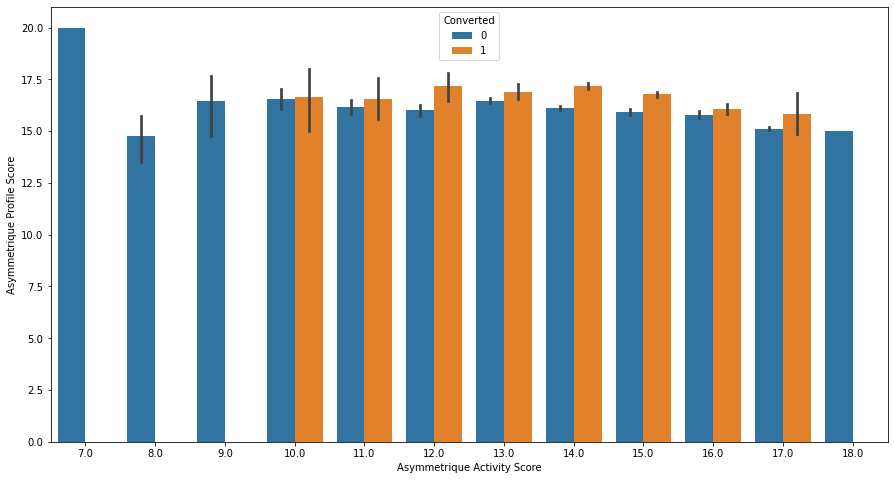

In [8]:
# Activity score vs profile score
plt.figure(figsize = (15,8))
sns.barplot(x ='Asymmetrique Activity Score' , y = 'Asymmetrique Profile Score' , hue = 'Converted' , data = df)

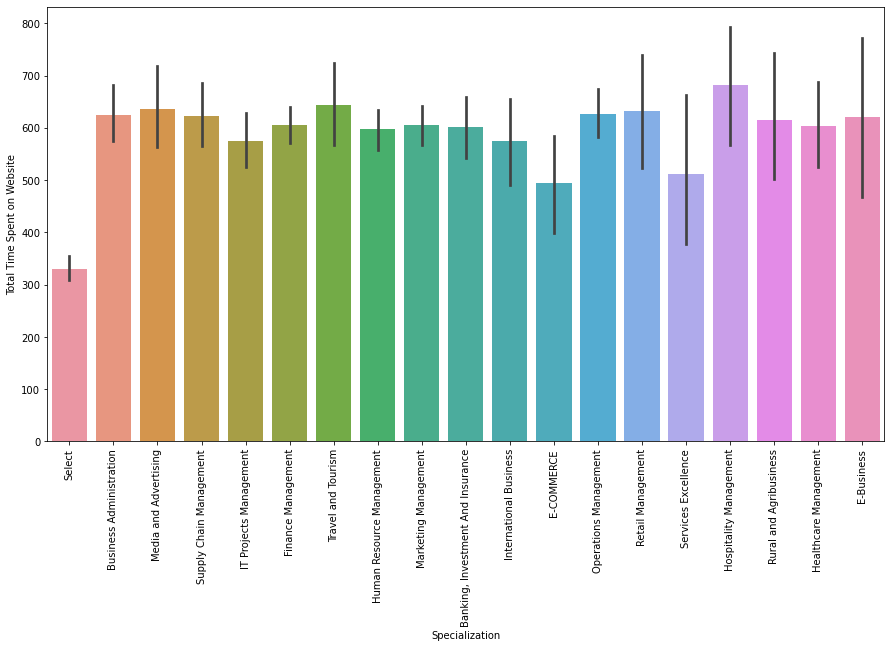

In [9]:
# Total Time Spent on Website vs Specialization
plt.figure(figsize = (15,8))
sns.barplot(x ='Specialization' , y = 'Total Time Spent on Website' ,  data = df)
plt.xticks(rotation = 90)
plt.show()

In [10]:
#sns.pairplot(df)

## Data Preparation 

In [11]:
# dropping Prospect ID & Lead Number
df.drop(['Prospect ID','Lead Number'],1,inplace=True)

In [12]:
# Checking null values
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [13]:
# Dropping all the columns having missing values >3000

for x in df.columns:
    if df[x].isnull().sum() > 3000:
        df.drop(x , 1 , inplace= True)

In [14]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [15]:
df.drop('Country' , 1 ,inplace = True)

In [16]:
# creating a list of missing values

miss = []

for x in df.columns :
    if df[x].isnull().sum() > 0 :
        miss.append(x)
        
miss

['Lead Source',
 'TotalVisits',
 'Page Views Per Visit',
 'Last Activity',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Lead Profile',
 'City']

In [17]:
miss.remove('TotalVisits')
miss.remove( 'Page Views Per Visit')

miss

['Lead Source',
 'Last Activity',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Lead Profile',
 'City']

In [18]:
# imputing missing values for the categorical features

from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy= 'most_frequent')

df[miss] = si.fit_transform(df[miss])
df[miss].head()

,Lead Source,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Lead Profile,City
0,Olark Chat,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,Select,Select
1,Organic Search,Email Opened,Select,Select,Unemployed,Better Career Prospects,Select,Select
2,Direct Traffic,Email Opened,Business Administration,Select,Student,Better Career Prospects,Potential Lead,Mumbai
3,Direct Traffic,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,Select,Mumbai
4,Google,Converted to Lead,Select,Other,Unemployed,Better Career Prospects,Select,Mumbai


In [19]:
df.isnull().sum()

Lead Origin                                        0
Lead Source                                        0
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                      0
Specialization                                     0
How did you hear about X Education                 0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                                  0
X Education Forums                                 0
Newspaper                                          0
Digital Advertisement                         

In [20]:
# imputing missing values using SimpleImputer

sii = SimpleImputer(strategy='mean')
df[['TotalVisits','Page Views Per Visit']] = sii.fit_transform(df[['TotalVisits','Page Views Per Visit']])
df[['TotalVisits','Page Views Per Visit']].isnull().sum()

TotalVisits             0
Page Views Per Visit    0
dtype: int64

So we have successfully imputed all the missing values !! 

In [21]:
# Checking the value_counts for each categorical feature

cat = df.select_dtypes(include='object')
cat = cat.columns
cat

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [22]:
df['Lead Profile'].value_counts()

Select                         6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [23]:
for x in cat:
    print(df[x].value_counts())

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
welearnblog_Home        1
blog                    1
testone                 1
youtubechannel          1
WeLearn                 1
NC_EDM                  1
Pay per Click Ads       1
Name: Lead Source, dtype: int64
No     8506
Yes     734
Name: Do Not Email, dtype: int64
No     9238
Yes       2
Name: Do Not Call, dtype: int64
Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page V

In [24]:
# dropping more columns as these columns have a dominance of only single values which makes no sense involving them in our model

cols_drop = ['Do Not Call', 'What matters most to you in choosing a course' ,'Lead Profile' ,'City','Get updates on DM Content',
             'I agree to pay the amount through cheque' ,'Update me on Supply Chain Content','Receive More Updates About Our Courses',
             'Through Recommendations' , 'Digital Advertisement' , 'Newspaper' , 'X Education Forums' ,'Newspaper Article',
             'Magazine','Search','How did you hear about X Education']

df.drop(cols_drop , 1, inplace= True)

In [25]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [26]:
# Selecting the categorical features

cat = df.select_dtypes(include='object').columns
cat

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [27]:
# Creating dummy variables

dummy = pd.get_dummies(df[cat] , drop_first= True)
df = pd.concat([df,dummy] , 1 )
df.drop(cat,1, inplace =True)
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,...,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [28]:
# Scaling the numerical variables

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = df.select_dtypes(include = ['int64','float64']).columns

df[num_vars] = scaler.fit_transform(df[num_vars])
df[num_vars].head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0.0,0.000000,0.000000,0.000000
1,0.0,0.019920,0.296655,0.045455
2,1.0,0.007968,0.674296,0.036364
3,0.0,0.003984,0.134243,0.018182
4,1.0,0.007968,0.628521,0.018182


In [29]:
# looking at the correlations

corr = df.corr().unstack().sort_values().drop_duplicates()[:20]
corr

What is your current occupation_Working Professional  What is your current occupation_Unemployed   -0.849653
Specialization_Select                                 Lead Origin_Landing Page Submission          -0.748263
Lead Source_Olark Chat                                Lead Origin_Landing Page Submission          -0.512950
Last Activity_SMS Sent                                Last Activity_Email Opened                   -0.512325
Specialization_Select                                 A free copy of Mastering The Interview_Yes   -0.509189
Last Notable Activity_Email Opened                    Last Notable Activity_Modified               -0.507426
Lead Source_Olark Chat                                Page Views Per Visit                         -0.499778
What is your current occupation_Unemployed            What is your current occupation_Student      -0.450486
Last Notable Activity_SMS Sent                        Last Activity_Email Opened                   -0.436864
Last Notable Activi

In [30]:
# Dropping high correlated values

df.drop(['Specialization_Select', 'Lead Origin_Landing Page Submission' ,
         'What is your current occupation_Unemployed','What is your current occupation_Working Professional'],1, inplace= True)

# Model Building


In [31]:
# creating X & y

X = df.drop('Converted',1)
y = df['Converted']

In [32]:
# Creating train & test datasets

from sklearn.model_selection import train_test_split

X_train, X_test , y_train ,y_test = train_test_split(X,y,train_size = 0.7 , random_state = 102)

X_train.shape, X_test.shape , y_train.shape ,y_test.shape

((6468, 79), (2772, 79), (6468,), (2772,))

In [33]:
# using different classification models

from sklearn.ensemble import RandomForestClassifier 

rf = RandomForestClassifier(max_depth = 6,n_jobs= -1 , random_state= 102)

rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, n_jobs=-1, random_state=102)

In [34]:
rf.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'random_state',
 'ccp_alpha')

In [35]:
rf.score(X_train,y_train)

0.8004019789734076

In [36]:
rf.score(X_test,y_test)

0.7886002886002886

In [37]:
# hyperparameter tuning of the model 

from sklearn.model_selection import RandomizedSearchCV

rf1 = RandomForestClassifier()

params = {
            'criterion':['gini','entropy'],
            'max_depth':[4,5,6,7,8,9,10,11,12,13,14,15],
             'min_samples_split':[2,4,6,8,10,12],
             'min_samples_leaf':[5,10,20,25,50,75,100],
             'n_jobs':[-1],
             'n_estimators': [5,8,10,12,14,16,20]
}

rcv = RandomizedSearchCV(param_distributions= params ,estimator= rf1 , n_jobs= -1 , n_iter= 15 , return_train_score= True , cv= 10 )
rcv.fit(X_train , y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8, 9, 10, 11,
                                                      12, 13, 14, 15],
                                        'min_samples_leaf': [5, 10, 20, 25, 50,
                                                             75, 100],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12],
                                        'n_estimators': [5, 8, 10, 12, 14, 16,
                                                         20],
                                        'n_jobs': [-1]},
                   return_train_score=True)

In [38]:
rcv.best_estimator_

RandomForestClassifier(max_depth=9, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=16, n_jobs=-1)

In [39]:
rcv.best_params_

{'n_jobs': -1,
 'n_estimators': 16,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_depth': 9,
 'criterion': 'gini'}

In [40]:
rcv.best_score_

0.8036414793689378

In [41]:
# building a new random forest model with hypertuned parameters

rf_cv = RandomForestClassifier(max_depth=13, min_samples_leaf=5, min_samples_split=6,n_estimators=10, n_jobs=-1 , criterion='gini')
rf_cv.fit(X_train,y_train)
rf_cv.score(X_train,y_train)

0.8291589363017935

In [42]:
# Creating a new dataframe to find an optimal threshold

#df_th = pd.Dataframe(X)

In [43]:
# Using RFE To select top features

from sklearn .feature_selection import RFE
rfe = RFE(rf_cv, 15)
rfe.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(max_depth=13, min_samples_leaf=5,
                                     min_samples_split=6, n_estimators=10,
                                     n_jobs=-1),
    n_features_to_select=15)

In [44]:
list(zip(rfe.support_,rfe.ranking_,X_train.columns[rfe.support_]))

[(True, 1, 'TotalVisits'),
 (True, 1, 'Total Time Spent on Website'),
 (True, 1, 'Page Views Per Visit'),
 (True, 1, 'Lead Origin_Lead Add Form'),
 (False, 29, 'Lead Source_Direct Traffic'),
 (False, 38, 'Lead Source_Google'),
 (True, 1, 'Lead Source_Reference'),
 (False, 35, 'Do Not Email_Yes'),
 (True, 1, 'Last Activity_Email Opened'),
 (False, 56, 'Last Activity_Olark Chat Conversation'),
 (False, 54, 'Last Activity_SMS Sent'),
 (False, 3, 'Specialization_Marketing Management'),
 (False, 6, 'A free copy of Mastering The Interview_Yes'),
 (False, 60, 'Last Notable Activity_Modified'),
 (False, 61, 'Last Notable Activity_SMS Sent')]

In [45]:
# Columns selected from rfe
cols = X_train.columns[rfe.support_]

In [46]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 20)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Activity_SMS Sent,6.314954
14,Last Notable Activity_SMS Sent,6.132920
3,Lead Origin_Lead Add Form,4.283085
6,Lead Source_Reference,4.049051
2,Page Views Per Visit,4.023922
0,TotalVisits,2.780779
12,A free copy of Mastering The Interview_Yes,2.539833
4,Lead Source_Direct Traffic,2.414585
1,Total Time Spent on Website,2.182233
13,Last Notable Activity_Modified,2.118142


In [48]:
# Dropping column with high vif
cols = cols.drop('Lead Origin_Lead Add Form',1 )
cols

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Reference', 'Do Not Email_Yes',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Specialization_Marketing Management',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [49]:
# building a new random forest model with hypertuned parameters

rf_cv1 = RandomForestClassifier(max_depth=13, min_samples_leaf=5, min_samples_split=6,n_estimators=10, n_jobs=-1 , criterion='gini')
rf_cv1.fit(X_train[cols],y_train)
rf_cv1.score(X_train[cols],y_train)

0.8358070500927643

In [50]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 20)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Activity_SMS Sent,6.279484
13,Last Notable Activity_SMS Sent,6.120169
2,Page Views Per Visit,3.996222
0,TotalVisits,2.780574
11,A free copy of Mastering The Interview_Yes,2.537981
3,Lead Source_Direct Traffic,2.405723
1,Total Time Spent on Website,2.179180
12,Last Notable Activity_Modified,2.096805
4,Lead Source_Google,2.095238
7,Last Activity_Email Opened,1.843886


In [51]:
# Dropping column with high vif
cols = cols.drop('Last Activity_SMS Sent',1 )
cols

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Reference', 'Do Not Email_Yes',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Specialization_Marketing Management',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [52]:
# building a new random forest model with hypertuned parameters

rf_cv2 = RandomForestClassifier(max_depth=13, min_samples_leaf=5, min_samples_split=6,n_estimators=10, n_jobs=-1 , criterion='gini')
rf_cv2.fit(X_train[cols],y_train)
rf_cv2.score(X_train[cols],y_train)

0.8368893011750155

In [53]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 20)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,3.982914
0,TotalVisits,2.780569
10,A free copy of Mastering The Interview_Yes,2.535129
3,Lead Source_Direct Traffic,2.404639
1,Total Time Spent on Website,2.178472
4,Lead Source_Google,2.084080
11,Last Notable Activity_Modified,1.813901
7,Last Activity_Email Opened,1.775166
12,Last Notable Activity_SMS Sent,1.666902
8,Last Activity_Olark Chat Conversation,1.249279


So these are the best features predicted by the model

In [54]:
list(zip( cols ,      rf_cv2.feature_importances_ ))

[('TotalVisits', 0.08348602996183181),
 ('Total Time Spent on Website', 0.4381695759367198),
 ('Page Views Per Visit', 0.049658296719529586),
 ('Lead Source_Direct Traffic', 0.012034792904778466),
 ('Lead Source_Google', 0.008554143385438164),
 ('Lead Source_Reference', 0.09859616174934317),
 ('Do Not Email_Yes', 0.022313455904886936),
 ('Last Activity_Email Opened', 0.0309814412536277),
 ('Last Activity_Olark Chat Conversation', 0.05284874326080876),
 ('Specialization_Marketing Management', 0.009130491848248178),
 ('A free copy of Mastering The Interview_Yes', 0.011272026284899001),
 ('Last Notable Activity_Modified', 0.04952100398530082),
 ('Last Notable Activity_SMS Sent', 0.13343383680458754)]

In [55]:
y_train_pred = rf_cv2.predict_proba(X_train[cols])[:,1]
y_train_pred

array([0.36857866, 0.88509003, 0.10493365, ..., 0.41076313, 0.64164595,
       0.9528951 ])

In [56]:
# Creating a new dataframe to calculate threshold

df_th = pd.DataFrame(y_train_pred ,columns=['Converted_prob'])

df_th['Converted'] = y_train.values

df_th['Predicted'] = df_th['Converted_prob'].map(lambda x:1 if x>0.5 else 0)

df_th.head()

,Converted_prob,Converted,Predicted
0,0.368579,0.0,0
1,0.885090,1.0,1
2,0.104934,0.0,0
3,0.092149,0.0,0
4,0.835481,1.0,1


In [57]:
# Evaluating on the train set

from sklearn.metrics import accuracy_score ,precision_recall_curve ,classification_report 

accuracy_score(df_th.Converted , df_th.Predicted)

0.8368893011750155

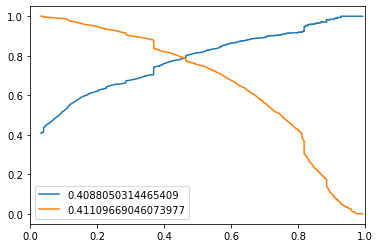

In [58]:
# Finding 
p , r, thresh = precision_recall_curve(df_th.Converted, df_th.Converted_prob)
sns.lineplot(x = thresh , y = p[:-1])
sns.lineplot(x = thresh , y = r[:-1])
plt.legend(p)
plt.xlim([0,1])
plt.show()

 SO threshold comes out to be 0.42

In [59]:
df_th['Final_predicted'] = df_th.Converted_prob.map(lambda x:1 if x>0.42 else 0)
df_th.head()

,Converted_prob,Converted,Predicted,Final_predicted
0,0.368579,0.0,0,0
1,0.885090,1.0,1,1
2,0.104934,0.0,0,0
3,0.092149,0.0,0,0
4,0.835481,1.0,1,1


In [60]:
# FInal accuracy 
accuracy_score(df_th.Converted ,df_th.Final_predicted)

0.8324056895485467

###  Evaluating on the test dataset

In [61]:
#calculating the y_test_pred
y_test_pred = rf_cv2.predict_proba(X_test[cols])[:,1]


In [62]:
# Creating a new dataframe test_df

test_df = pd.DataFrame(y_test_pred , columns = ['Converted_Prob'])
    
test_df['Converted'] = y_test.values

test_df['Predicted'] = test_df['Converted_Prob'].map(lambda x:1 if x >0.42 else 0)

test_df.head()

,Converted_Prob,Converted,Predicted
0,0.525886,1.0,1
1,0.885090,1.0,1
2,0.073561,0.0,0
3,0.083513,0.0,0
4,0.118352,0.0,0


### Model Evaluation 

In [63]:
accuracy_score(test_df.Converted,test_df.Predicted)

0.7871572871572872

In [64]:
print(classification_report(test_df.Converted,test_df.Predicted))

              precision    recall  f1-score   support

         0.0       0.84      0.81      0.83      1746
         1.0       0.70      0.74      0.72      1026

    accuracy                           0.79      2772
   macro avg       0.77      0.78      0.77      2772
weighted avg       0.79      0.79      0.79      2772



# Conclusions

Features contributing towards conversion of "leads" to "customer" are as follows: 
    
       Total Visits
       Total times spent on website
       Page views per visit
       Lead source : direct traffic
       lead source : Google
       lead source : Refrence
       Opted Donot email
       Last activity email opened
       A free copy of Mastering The Interview recieved
       Last Notable Activity_Modified
       Last Notable Activity_SMS Sent